# 야후 파이낸스로 주식시세 구하기
  ### 야후 파이낸스에서 제공하는 삼성전자와 마이크로소프트 주식 시세를 데이터프레임으로 받아 분석
   * 야후 파이낸스는 pip install yfinance로 설치
   * 팬더스-데이터리더 라이브러리 pip installpandas-datareader로 설치
   * 주식 시세를 구하기 위해서는 get_data_yahoo() 함수 사용
    - get_data_yahoo(조회할 주식,start=조회기간시작일, end=조회기간의 종료일)
    - 조회할 주식은 문자열이나, 리스트
    - 조회 기간은 생략할 수 있다.
    - 코스피종목을 조회하려면 6자리 종목코드 뒤에 .KS  
    - 코스닥종목을 조회하려면 종목코드 뒤에 .KQ
    - 미국기업 주식종목을 조회하려면 심볼(티커)를 사용하여 조회한다. 

In [40]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

In [2]:
sec = pdr.get_data_yahoo('005930.KS',start='2019-01-01')  # 삼성주식
msft = pdr.get_data_yahoo('MSFT',start='2019-01-01') # 마이크로 소프트 주식

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,38750.0,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,37600.0,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,37450.0,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,38750.0,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,38100.0,12756554


In [5]:
msft.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,213.490005,213.990005,211.320007,212.460007,212.460007,27158400
2020-10-02,208.000000,210.990005,205.539993,206.190002,206.190002,33154800
2020-10-05,207.220001,210.410004,206.979996,210.380005,210.380005,21331600
2020-10-06,208.820007,210.179993,204.820007,205.910004,205.910004,28554300
2020-10-07,207.059998,210.110001,206.720001,209.830002,209.830002,25648100


##### 변수설명
* Open : 시가. 매일 열리는 주식 시장의 첫 시작 가격
* High : 고가. 가장 높은 금액으로 거래
* Low : 저가. 가장 낮은 금액으로 거래
* Close : 종가. 하루 열린 장에서 가장 마지막으로 거래가 완료된 가격을 종가
* Adj Close : 수정종가. 주식가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식에 맞춰 수정하여 표시한 가격
* Volume : 거래량. 매매된 주식의 수량

In [6]:
sec.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-28', '2020-09-29', '2020-10-05', '2020-10-06',
               '2020-10-07', '2020-10-08'],
              dtype='datetime64[ns]', name='Date', length=436, freq=None)

In [7]:
msft.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-05',
               '2020-10-06', '2020-10-07'],
              dtype='datetime64[ns]', name='Date', length=447, freq=None)

* 삼성전자(sec)와 마이크로소프트(msft)는 인덱스가 dataime형으로 되어 있다. 

In [8]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### 삼성전자와 마이크로소프트 종가 데이터를 이용한 그래프 

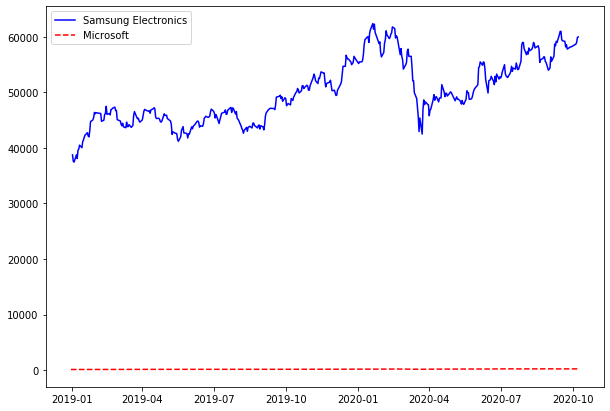

In [9]:
plt.figure(figsize=(10,7))
plt.plot(sec.index,sec['Close'],'b',label='Samsung Electronics')
plt.plot(msft.index,msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()

##### 그래프설명
 - 삼성전자는 50000원 대 , 마이크로소프트는 130달러 대의 주가이기 때문에 숫자 차이가 커서 마이크로소프트 주가가 0인것 처럼 보인다.
 - 비교가 어렵기 때문에 일간변동률을 이용해 비교해 본다.
<br/>
<br/>


##### 코드 설명
* x 축에는 인덱스(날짜), y축에는 Close(종가)데이터.
* plt.legend(loc='best')   ->  라벨 표가 적당히 빈 자리에 위치

### 일간변동률로 삼성전자와 마이크로소프트 주가 비교하기

일간 변동률 = (오늘종가-어제종가)/어제종가 *100

In [10]:
sec['Close']

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2020-09-29    58200.0
2020-10-05    58700.0
2020-10-06    59000.0
2020-10-07    59900.0
2020-10-08    60000.0
Name: Close, Length: 436, dtype: float64

In [13]:
sec['Close'].shift(1)

Date
2019-01-02        NaN
2019-01-03    38750.0
2019-01-04    37600.0
2019-01-07    37450.0
2019-01-08    38750.0
               ...   
2020-09-29    58200.0
2020-10-05    58200.0
2020-10-06    58700.0
2020-10-07    59000.0
2020-10-08    59900.0
Name: Close, Length: 436, dtype: float64

* shift는 데이터를 이동시킬 떄 사용하는 함수이다.  
* shift(?)  ->  ?만큼 이동시킨다. 
* 한 칸씩 밀려서 1월2일자 주식정보가 1월3일로 들어가 있다. 그 말은 1월 3일 입장에서는 어제 날짜의 주식정보가 들어가 있는 것이다.
* 즉, shift를 이용해서 해당날짜의 어제 주식정보를 들어가게 입력해 주었다. 

#### 일간변동률 코드

In [14]:
sec_dpc = (sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1)*100   # 삼성

In [15]:
msft_dpc = (msft['Close']-msft['Close'].shift(1))/msft['Close'].shift(1)*100  # 마이크로소프트

In [16]:
sec_dpc

Date
2019-01-02         NaN
2019-01-03   -2.967742
2019-01-04   -0.398936
2019-01-07    3.471295
2019-01-08   -1.677419
                ...   
2020-09-29    0.000000
2020-10-05    0.859107
2020-10-06    0.511073
2020-10-07    1.525424
2020-10-08    0.166945
Name: Close, Length: 436, dtype: float64

###### NaN값을 0으로 바꾼다.

In [17]:
sec_dpc.iloc[0] = 0 
sec_dpc

Date
2019-01-02    0.000000
2019-01-03   -2.967742
2019-01-04   -0.398936
2019-01-07    3.471295
2019-01-08   -1.677419
                ...   
2020-09-29    0.000000
2020-10-05    0.859107
2020-10-06    0.511073
2020-10-07    1.525424
2020-10-08    0.166945
Name: Close, Length: 436, dtype: float64

In [18]:
msft_dpc.iloc[0] = 0 
msft_dpc

Date
2018-12-31    0.000000
2019-01-02   -0.443041
2019-01-03   -3.678799
2019-01-04    4.650923
2019-01-07    0.127536
                ...   
2020-10-01    1.012697
2020-10-02   -2.951146
2020-10-05    2.032107
2020-10-06   -2.124727
2020-10-07    1.903743
Name: Close, Length: 447, dtype: float64

###### 그래프그리기

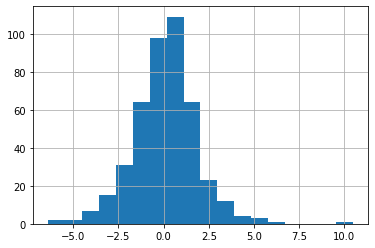

In [19]:
plt.hist(sec_dpc,bins=18)
plt.grid(True)
plt.show()

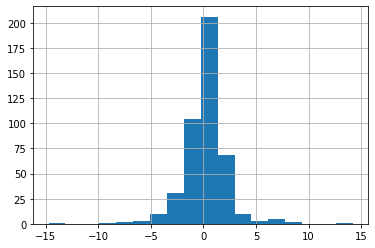

In [20]:
plt.hist(msft_dpc,bins=18)
plt.grid(True)
plt.show()

#### 일간변동률 누적합 
* sec_dpc와 msft_dpc 는 일간변동률이다. 하지만 전체적인 변동룰의 비교해보려면 일간변동률의 누적합이 필요하다. 
* cumsum() 함수를 이용해 누적합을 구한다.

In [21]:
sec_dpc_sum = sec_dpc.cumsum()
msft_dpc_sum = msft_dpc.cumsum()

In [22]:
sec_dpc_sum

Date
2019-01-02     0.000000
2019-01-03    -2.967742
2019-01-04    -3.366678
2019-01-07     0.104617
2019-01-08    -1.572802
                ...    
2020-09-29    47.756290
2020-10-05    48.615397
2020-10-06    49.126470
2020-10-07    50.651894
2020-10-08    50.818839
Name: Close, Length: 436, dtype: float64

In [23]:
msft_dpc_sum

Date
2018-12-31     0.000000
2019-01-02    -0.443041
2019-01-03    -4.121840
2019-01-04     0.529083
2019-01-07     0.656619
                ...    
2020-10-01    84.626803
2020-10-02    81.675657
2020-10-05    83.707765
2020-10-06    81.583037
2020-10-07    83.486781
Name: Close, Length: 447, dtype: float64

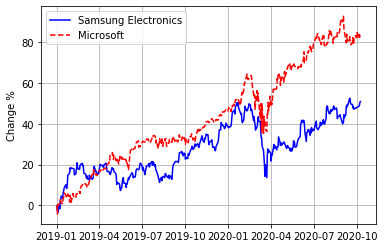

In [24]:
plt.plot(sec.index,sec_dpc_sum,'b',label='Samsung Electronics')
plt.plot(msft.index,msft_dpc_sum,'r--',label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# MDD(Maximum Drawdown) 최대 손실낙폭
* 최대손실낙폭은 특정기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미. 
* 퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할 만큼 중요한 지표이다. 
* MDD에서는 rolling()함수가 중요하다!!!
   - 사용법 : 시리즈.rolling(윈도우,min_periods=1).집계합수()
   - rolling의 시리즈에서 윈도우 크기에 해당하는 갯수만큼 데이터를 추출하여 집계함수에 해당하는 연산을 한다.
   - 집계합수는 max,min,mean 등을 사용할 수 있다.
   

In [25]:
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')    # ^KS11은 코스피지수를 의미

[*********************100%***********************]  1 of 1 completed


In [26]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05,817.280029,825.429993,816.549988,824.099976,824.099976,408200
2004-01-06,831.260010,831.260010,819.530029,823.429993,823.429993,484000
2004-01-07,826.080017,831.070007,825.229980,827.070007,827.070007,404600
2004-01-08,831.099976,839.280029,824.150024,824.150024,824.150024,428800
2004-01-09,835.419983,849.500000,835.049988,845.270020,845.270020,543200
...,...,...,...,...,...,...
2020-09-29,2331.510010,2339.830078,2320.040039,2327.889893,2327.889893,646200
2020-10-05,2330.550049,2364.729980,2327.830078,2358.000000,2358.000000,763600
2020-10-06,2369.169922,2378.280029,2355.389893,2365.899902,2365.899902,861800


In [27]:
window = 252   # 1년동안의 주식 개장일을 약 252로 선정했다. 

peak = kospi['Adj Close'].rolling(window,min_periods=1).max() # 코스피종가컬럼에서 최고치 peak을 구한다.

drawdown = kospi['Adj Close']/peak-1  # 최고치 대비 현재 kospi종가가 얼마나 하락했는지 구한다.

max_dd = drawdown.rolling(window,min_periods=1).min()  # 최저치구하기. 여기서 최저치가 최대낙폭손실이 된다. 

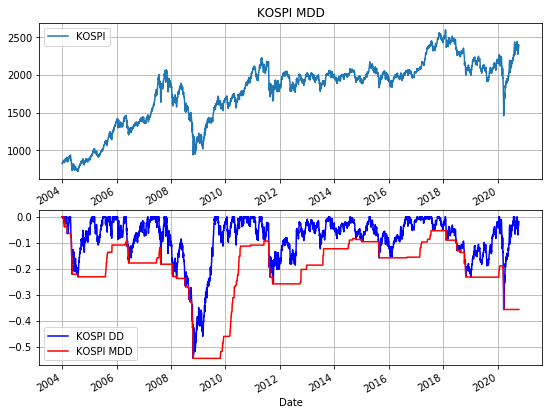

In [28]:
plt.figure(figsize=(9,7))
plt.subplot(211)  # 2행1열 중 1행에 그린다. 
kospi['Close'].plot(label = 'KOSPI', title = 'KOSPI MDD', grid =True, legend=True)

plt.subplot(212)  # 2행1열 중 2행에 그린다. 
drawdown.plot(c='blue', label = 'KOSPI DD', grid=True,legend=True)
max_dd.plot(c='red', label = 'KOSPI MDD', grid=True, legend=True)
plt.show()

In [29]:
max_dd.min()

-0.5453665130144085

- 2008년 10월 금융위기 장시 KOSPI지수가 하락하면서 MDD가 약 -54.5%를 기록했다. 정확한 수치는 위와 같다.
<br/>
<br/>

- MDD를 기록한 구간을 구하기 위해 아래과 같이 적용.
    * 2008년 10월 24일부터 2009년 10월 21일까지 약 1년간 주어진 max_dd 수치와 일치한 것을 확인할 수 있다.

In [30]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

# KOSPI와 다우존스 지수비교
* 국내주식과 미국주식의 상관관계를 비교하기 위해 야후 파이낸스로 부터 2000년 1월부터 현재까지 KOSPI와 다우존스 지수 데이터를 불러온다.

In [31]:
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


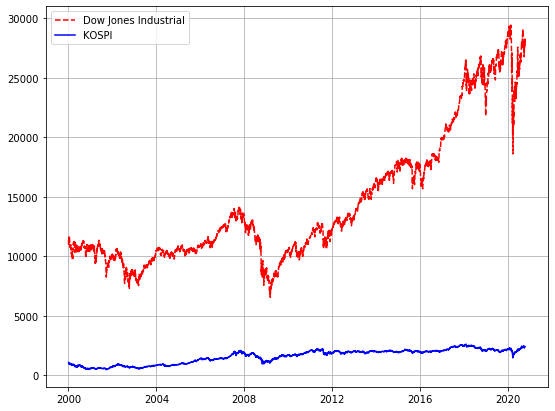

In [32]:
plt.figure(figsize=(9,7))
plt.plot(dow.index,dow.Close,'r--',label='Dow Jones Industrial')
plt.plot(kospi.index,kospi['Close'],'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

* 일반종가로는 지수수치 차이가 많이나서 그래프를 해석하기 힘들다. 
* 현재종가를 특정시점 종가로 나누어 변동률을 구해보자. (지수화 이용)

#### 지수화 비교

In [33]:
d = (dow.Close/dow.Close.loc['2000-01-04'])*100
k = (kospi.Close/kospi.Close.loc['2000-01-04'])*100

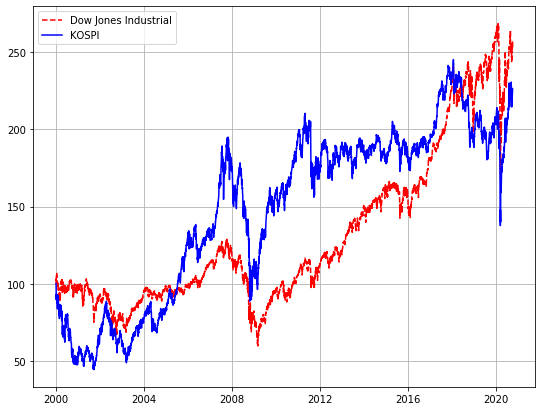

In [34]:
plt.figure(figsize=(9,7))
plt.plot(d.index,d,'r--',label='Dow Jones Industrial')
plt.plot(k.index,k,'b',label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

* 종가(dow[Close])를 2000년 1월 4일 종가로 나눈 뒤 100을 곱하면 2000년 1월4일 종가대비 해당 날짜의 변동률을 구할 수 있다. 
* 이런것을 '지수화'라고 한다. 
<br/>
<br/>
* 지수화를 하고 나니 20년간 KOSPI상승률과 다우존스지수의 상승률이 비슷하다는 것을 알 수 있다.


#### 산점도분석
* x축은 독립변수, y축은 종속변수
* 미국시장과 국내시장의 상관관계를 살펴보고자 x축에 다우존스지수, y축에 KOSPI지수

In [38]:
print(len(dow))
print(len(kospi))

5225
5112


* 2개를 비교해서 산점도를 그리기 위해서는 사이즈가 동일해야 한다.
<br/>
<br/>
<br/>
* 다우존스 지수 종가와 KOSPI 지수 종가를 합쳐 df라는 데이터프레임을 생성한다.

In [42]:
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-10-02,27682.810547,NaN
2020-10-05,28148.640625,2358.000000
2020-10-06,27772.759766,2365.899902


* 한쪽에 데이터 값이 없으면 자동적으로 NaN값을로 채워준다.
* 산점도를 출력하려면 NaN값이 존재하면 안되기 때문에 NaN값제거!
<br/>
<br/>
* fillna를 사용하여 NaN값을 채운다.<br> bfill은 뒤에 있는 값을로 NaN값을 채운다는 것이다.

In [46]:
df = df.fillna(method='bfill')

In [47]:
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-10-02,27682.810547,2358.000000
2020-10-05,28148.640625,2358.000000
2020-10-06,27772.759766,2365.899902


* bfill은 NaN뒤에 있는 값으로 NaN을 채우는 것이기 때문에 만약 가장 맨 밑의 행에 NaN이 있으면 이 것은 bfill로 채울 수 없다. <br> 이럴 때는 ffill을 이용해서 NaN앞에 있는 값으로 NaN값을 채운다.

In [48]:
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-10-02,27682.810547,2358.000000
2020-10-05,28148.640625,2358.000000
2020-10-06,27772.759766,2365.899902


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


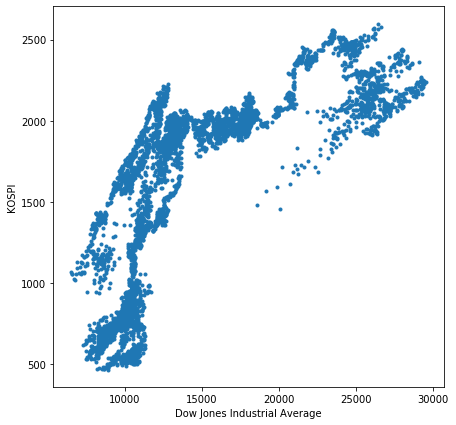

In [49]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

* 다우존스 지수와 KOSPI지수는 어느 정도 영향을 미친다는 사실을 확인 할 수 있다.<br> 이를 더 자세히 확인하기 위해 션형회귀를 사용해서 다시 확인하겠다.

#### 선형회귀분석
* linregress()함수 : 객체 2개만으로 간단히 선형회귀모델을 생성하여 분석할 수 있다. 
     - slope     : 기울기
     - intercept : y절편
     - rvalue    : 상관계수
     - pvalue    : p값
     - stderr    : 표준편차

In [51]:
from scipy import stats
regr = stats.linregress(df['DOW'],df['KOSPI'])
regr

LinregressResult(slope=0.07771393814600742, intercept=447.15958557950944, rvalue=0.7485733897459776, pvalue=0.0, stderr=0.0009384711953854392)

#### 상관계수
* corr()함수 : 독립변수와 종속변수 사이의 상관관계 정도를 나타내는 수치
    - -1 ~ 1 사이이다.
    -  1  : 가장 강한 양의 상관관계
    - -1 : 가장 강한 음의 상관관계
    - 0  : 상관관계 없음

In [53]:
df.corr()

# 시리즈로 상관계수 구하기
df['DOW'].corr(df['KOSPI'])

0.7485733897459775

#### 결정계수
* 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지를 나타내는 계수
* 상관계수를 제곱한 값
* r_squared
     - 결정계수가 1이면 추정된 회귀선이 변수 간의 관계를 완벽하게 설명한다.
     - 결정계수가 0이면 회귀선이 변수 사이의 관계를 전혀 설명하지 못한다.

#### 회귀분석 비교 (다우존스와 KOSPI)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


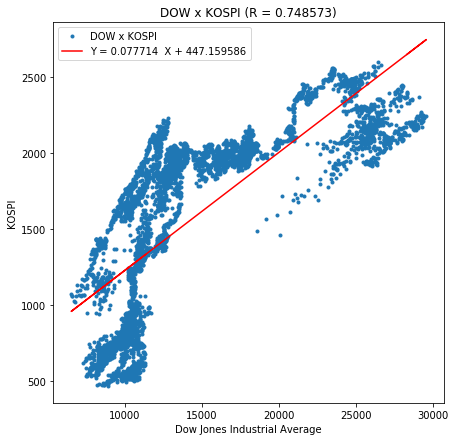

In [54]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')   
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

* 다우존스와 KOSPI간의 상관관계는 0.748573 <br> 회귀식은 Y = 0.077714x + 44.159586

###### 해리 마코위츠 박사가 체계화한 ' 현대 포트폴리오 이론' 에 따르면 투자에 대한 수익과 위험은 평균과 분산으로 나타낼 수 있으며, 상관관게가 낮은 자산을 대상으로 분산 투자하면  위험을 감소시킬 수 있다'
<br>

###### 상관계수에 따른 리스트 완화 효과
* 1   : 리스트 완화 효과 없음
* 0.5 : 중간정도의 리스크 완화 효과 있음
* 0   : 상당한 리스크 완화 효과가 있음
* -0.5: 대부분의 리스크를 제거함
* -1  : 모든 리스크를 제거함